# Loan Application Status Prediction

Project Description :    
This dataset includes details of applicants who have applied for loan.    
The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:   
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.  
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### Loading the Dataset and showing first 5 rows

In [2]:
df_loan = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Here Loan_Status is our traget variable/label which is of class type.

## Exploratory Data Analysis(EDA)

In [3]:
#checking the dimension of the dataset
df_loan.shape

(614, 13)

This dataset contains 614 rows and 13 columns(where 12 features and one label i.e. "Loan_Status").

In [4]:
#getting the information from the dataset
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Observation :
We can see there are 3 different types of data (int,folat and object) present in the dataset.  
We can also see there are null values present in some columns in the dataset.

In [5]:
# checking for the missing values
df_loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Here we can see the count of missing values present in the columns in the dataset.We will treat them later.

In [6]:
# Checking the Unique Values of Each Column
df_loan.apply(pd.Series.unique)

Loan_ID              [LP001002, LP001003, LP001005, LP001006, LP001...
Gender                                             [Male, Female, nan]
Married                                                 [No, Yes, nan]
Dependents                                          [0, 1, 2, 3+, nan]
Education                                     [Graduate, Not Graduate]
Self_Employed                                           [No, Yes, nan]
ApplicantIncome      [5849, 4583, 3000, 2583, 6000, 5417, 2333, 303...
CoapplicantIncome    [0.0, 1508.0, 2358.0, 4196.0, 1516.0, 2504.0, ...
LoanAmount           [nan, 128.0, 66.0, 120.0, 141.0, 267.0, 95.0, ...
Loan_Amount_Term     [360.0, 120.0, 240.0, nan, 180.0, 60.0, 300.0,...
Credit_History                                         [1.0, 0.0, nan]
Property_Area                                [Urban, Rural, Semiurban]
Loan_Status                                                     [Y, N]
dtype: object

#### Observations:
- Loan_ID only having the unique ids.So we can drop it is not having impact on our target.
- Target Variable 'Loan_Status' is having object datatype and It is categorical variable and of binary class.
- Gender, Married,Dependents, Education,Self Employed, Property_Area are categorical features.
- ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term and Credit_History are numerical features.

In [8]:
#Dropping out the unrequired column
df_loan.drop(['Loan_ID'],axis='columns',inplace=True)

In [9]:
df_loan.shape

(614, 12)

In [10]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


### Imputation (Filling null values)

In [11]:
#Imputation of features having categorical value 
df_loan['Gender'].fillna(df_loan['Gender'].mode()[0],inplace=True)
df_loan['Married'].fillna(df_loan['Married'].mode()[0],inplace=True)
df_loan['Dependents'].fillna(df_loan['Dependents'].mode()[0], inplace=True)
df_loan['Self_Employed'].fillna(df_loan['Self_Employed'].mode()[0],inplace=True)
df_loan['Credit_History'].fillna(df_loan['Credit_History'].mode()[0],inplace=True)

#Imputation of Numerical features
df_loan['LoanAmount'].fillna(df_loan['LoanAmount'].median(), inplace=True)
df_loan['Loan_Amount_Term'].fillna(df_loan['Loan_Amount_Term'].mode()[0],inplace=True)

In [12]:
#Checking
df_loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now we can see that all null values has been removed.

### Seggregating numerical and categorical columns

In [13]:
#Checking for categorical columns
cat_col=[]
for i in df_loan.dtypes.index:
    if df_loan.dtypes[i]=="object":
        cat_col.append(i)
print("Categorical Columns:", cat_col)

Categorical Columns: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [14]:
#Checking for numerical columns
num_col=[]
for i in df_loan.dtypes.index:
    if df_loan.dtypes[i]!="object":
        num_col.append(i)
print("Numerical Columns:\n", num_col)

Numerical Columns:
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


## Statistical analysis

In [15]:
#summary of the numerical dataset
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Observations:  
- The counts of all the columns are same i.e,614 which means there are no missing values present in it.
- Applicant's minimum income is 150 and maximum is 81000.
- Minimum Term for Loan amount is 12 Months while Maximum Loan term is 480.
- Since Credit History has Categorical variable there is no significance in different statstical parameter of it.
- Taking 75% and Max rows into consideration we can say that Outliers exist in Applicant Income, Coapplicant Income and Loan Amount.We will investigate regarding outliers later.


## Data Visualization Analysis

### Visualization of Categorical columns

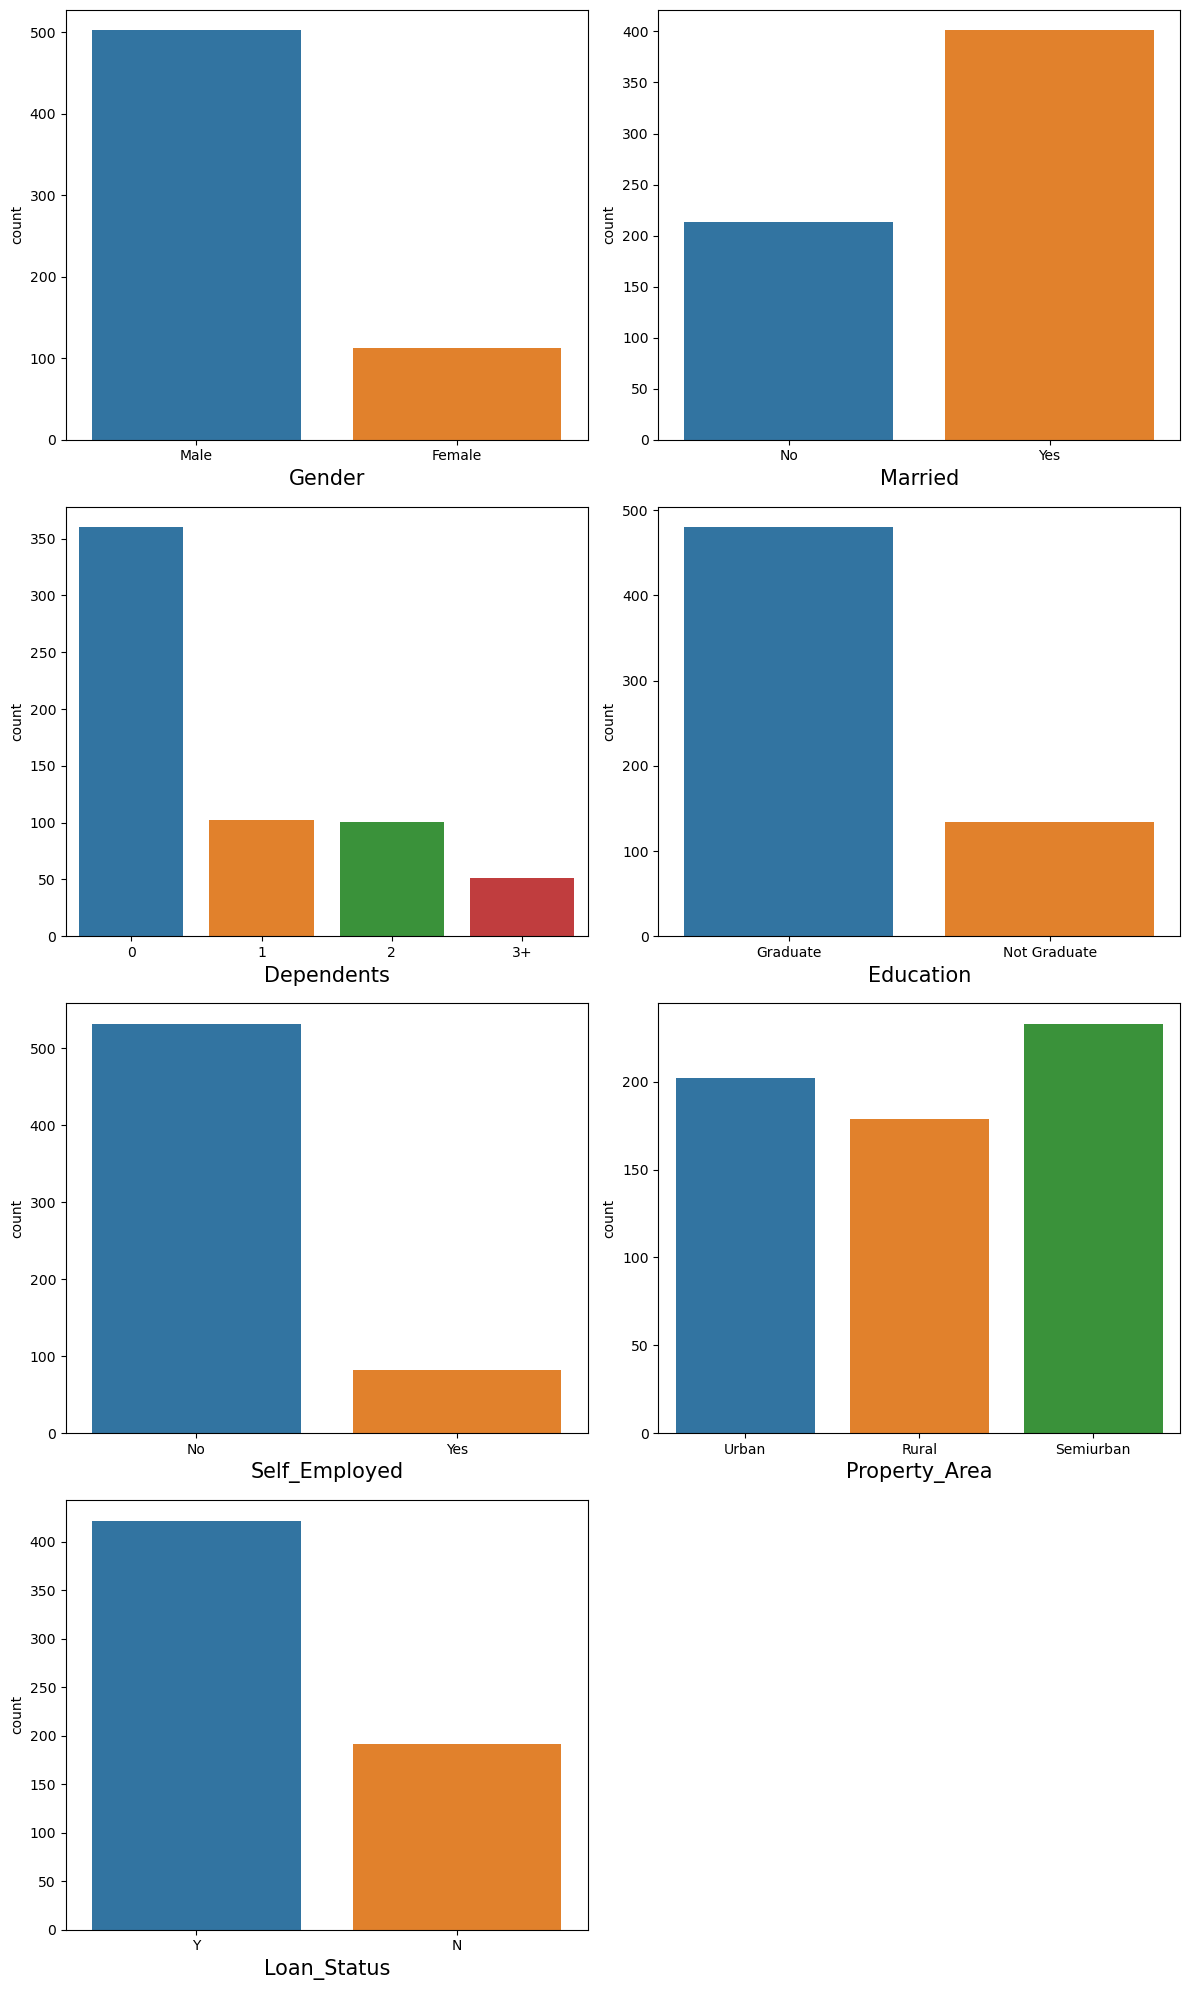

In [18]:
plt.figure(figsize=(12,20),facecolor='white')
plotnumber=1
for column in cat_col:
    if plotnumber <= 7:
        ax=plt.subplot(4,2,plotnumber)
        sns.countplot(df_loan[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

#### From the above graphs we can observe the followings :  
- The no of male applicants are consideratively higher than female applicants.
- The count of married applicants are more than unmarried.
- The applicants who have 0 dependents have high counts and the applicants having more than 3 dependents are least.
- Graduate applicants are comparitively higher than the non-Graduates.
- The count of self-employed applicants are very less than non self-employed applicants.
- Applicants having property in suburban area is higher follwed by urban and rural.
- The approval of loan status is consideratively higher than non-approval.
#### Note: The dataset of target variable 'loan_Status' is highly imbalance, we will do the sampling later.

### Bivariate Analysis

### Visualizing the relationship between the features and target

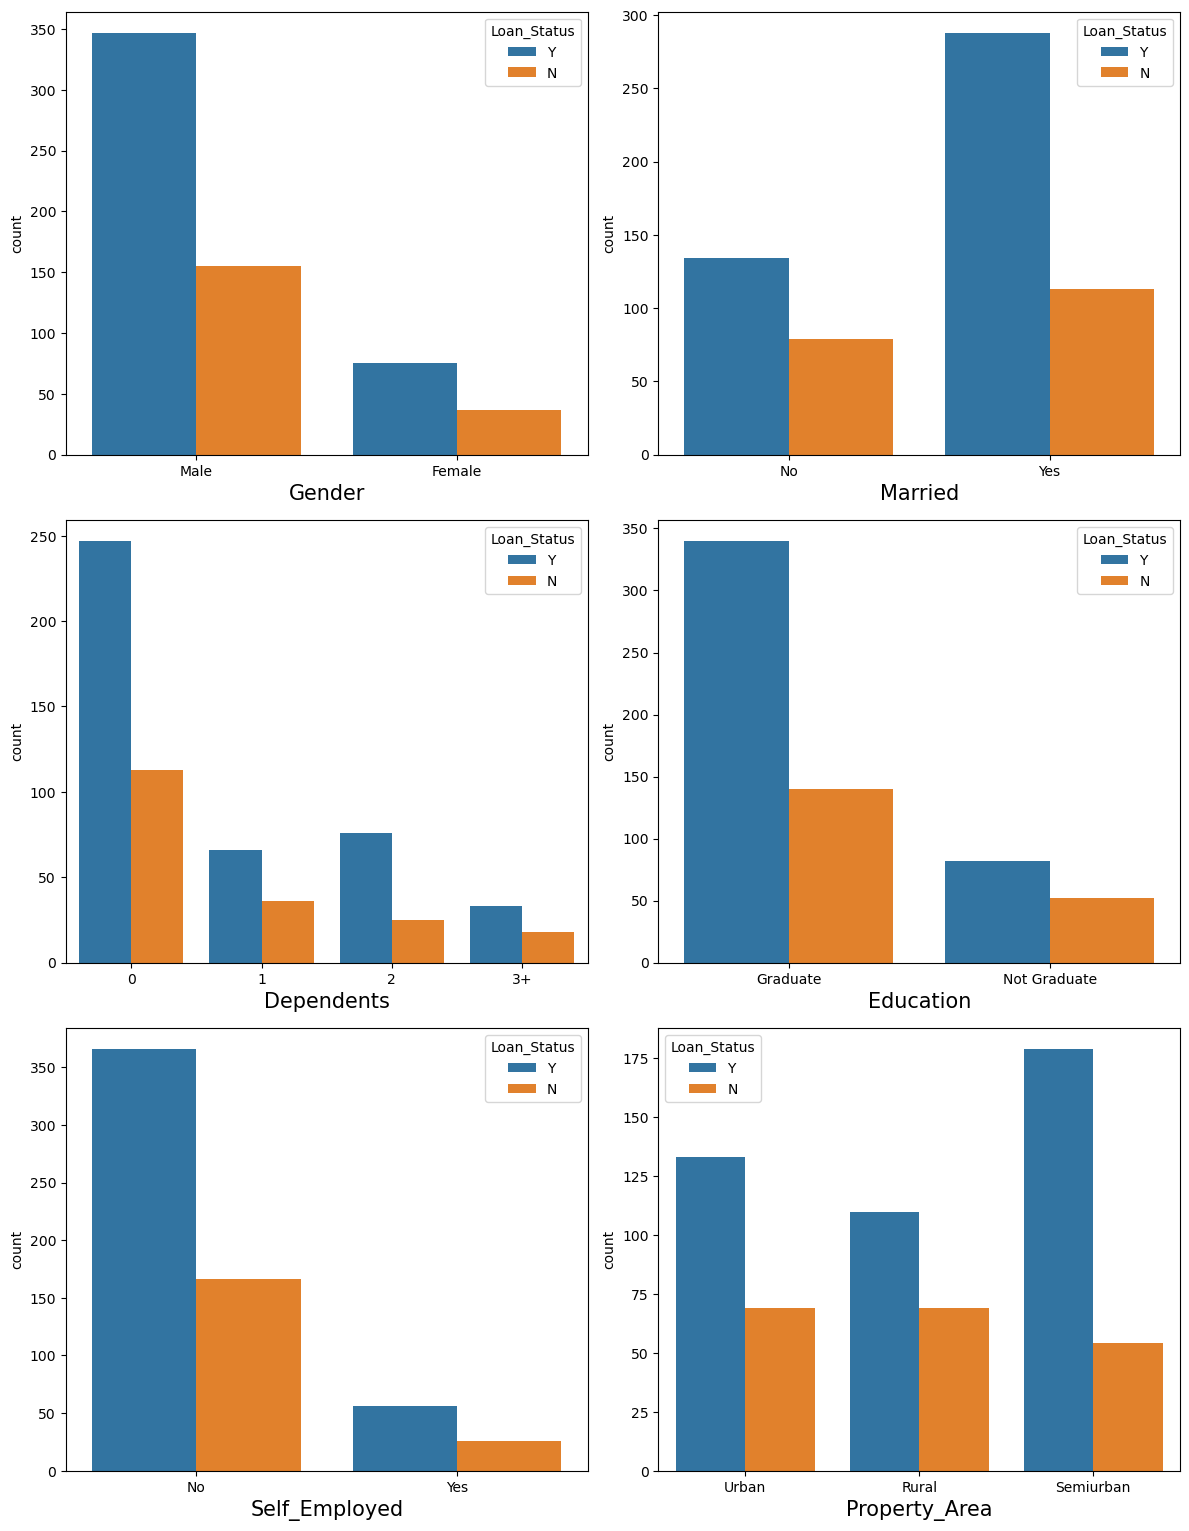

In [28]:
plt.figure(figsize=(12,20),facecolor='white')
plotnumber=1
for column in cat_col:
    if plotnumber <= 6:
        ax=plt.subplot(4,2,plotnumber)
        sns.countplot(df_loan[column],hue=df_loan["Loan_Status"])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

#### Observations:  
- The male applicants who have applied for the loan have got approved compared to the female applicants.
- The loan status approved is higher for the married group.
- The applicants who have dependents 0 are more likely to get their loan approved.
- Graduated applicants loan approval is higher than non-graduates.
- The applicants who are not self employed have the tendancy of getting their loans than self employed applicants.
- Applicants having property in suburban area are higher in loan aproval follwed by urban and rural.

### Data Distribution Analysis by Visualization of Numerical columns

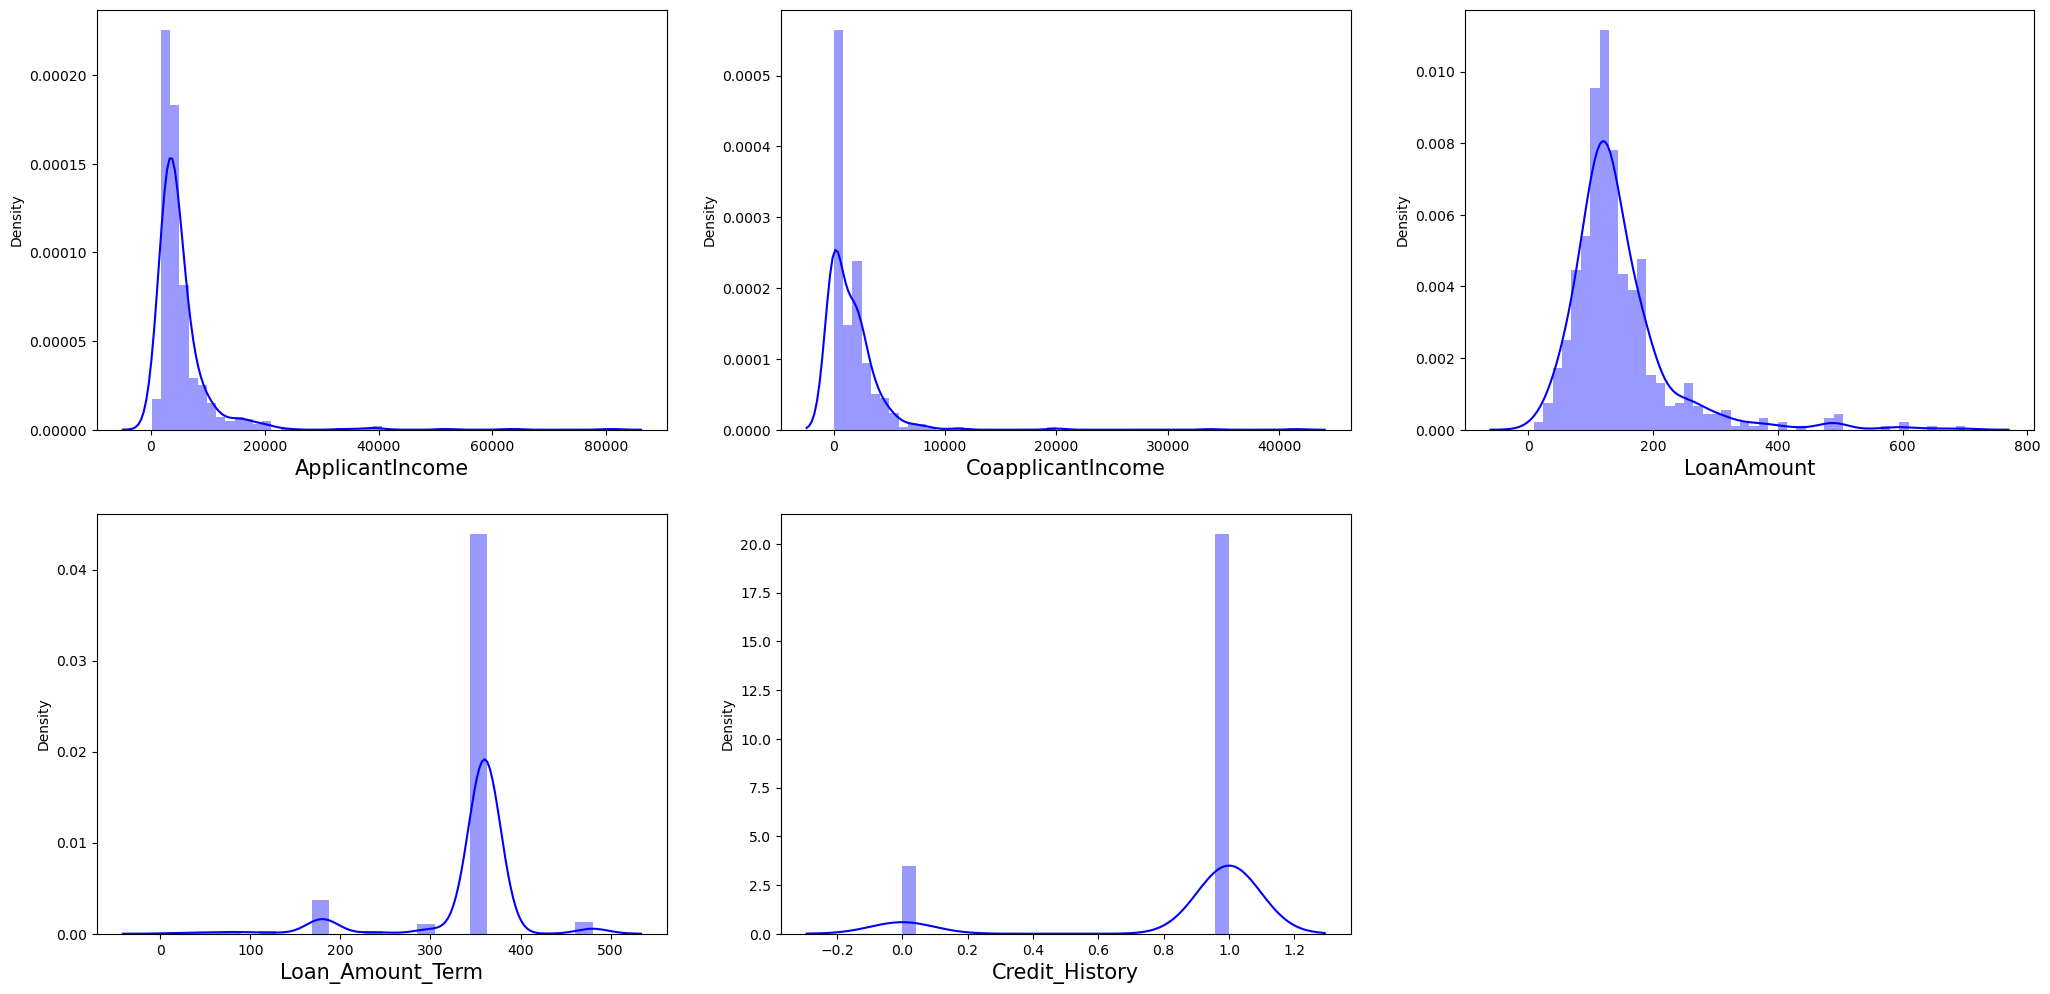

In [33]:
plt.figure(figsize=(25,12),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber <= 5:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df_loan[column],color='b')
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

From the above distribution plot we can observe that the data is not normally distributed in all the columns which suggest presence of outliers.We will investigate further using boxplot.

### Visualizing the outliers using boxplot

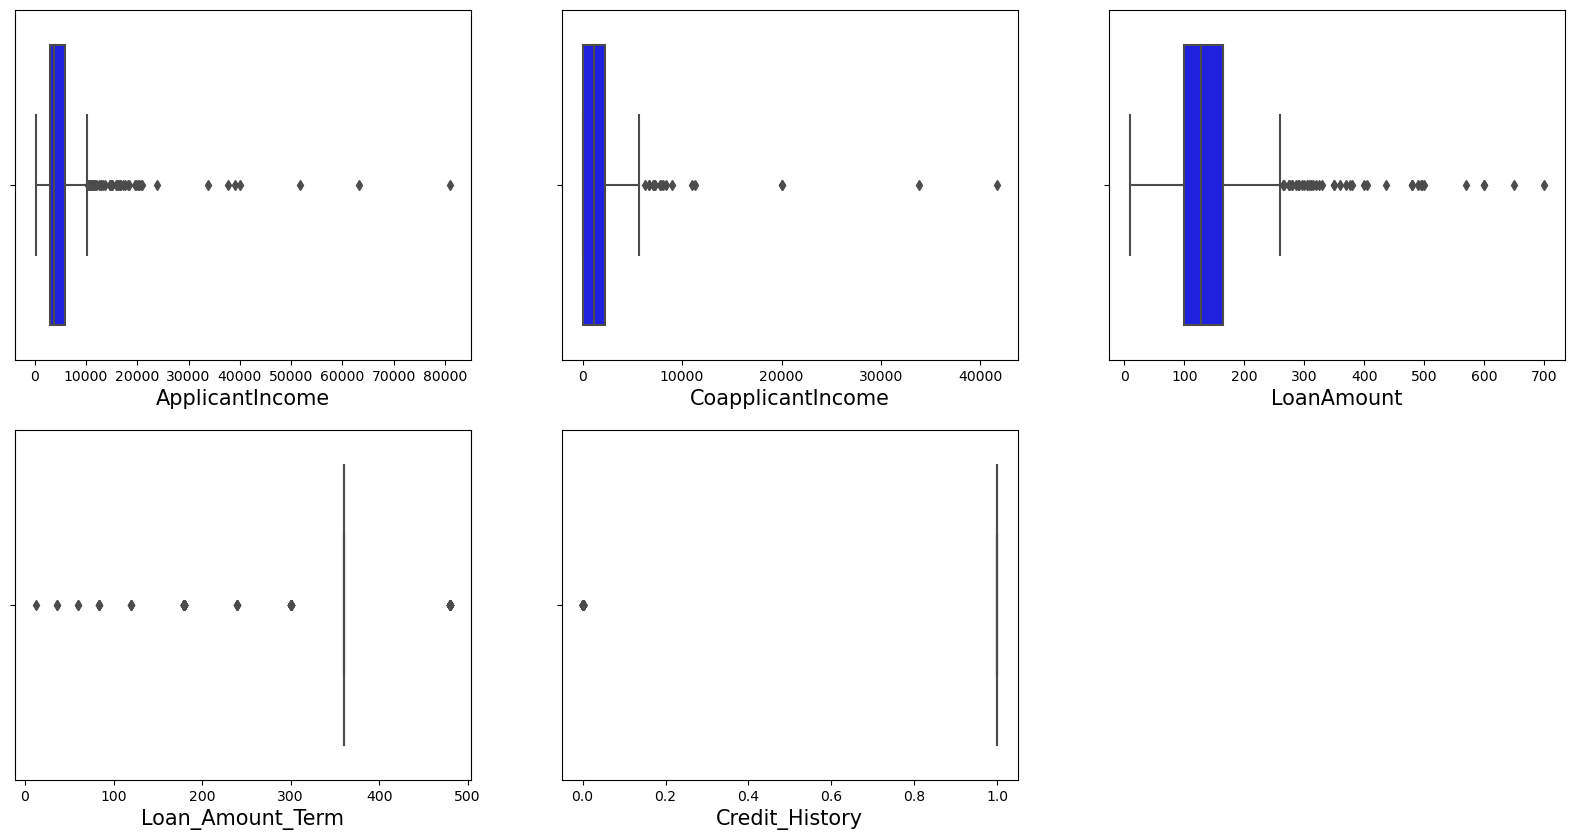

In [34]:
plt.figure(figsize=(20,10),facecolor='white')
graph=1
for column in num_col:
    if graph <= 5:
        ax=plt.subplot(2,3,graph)
        sns.boxplot(df_loan[column],color='b')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In the boxplot we can notice the outliers present in all the columns.   
Let's remove outliers from the columns using Zscore method.

### Removing outliers using z-score method

In [35]:
from scipy.stats import zscore
z=zscore(df_loan[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
abs_z=np.abs(z)
df_loan=df_loan[(abs_z<3).all(axis=1)]  #3-std deviation data
df_loan.shape

(577, 12)

Before the size was (614, 12).

## Encoding the categorical columns

In [37]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_col:
    df_loan[i] = le.fit_transform(df_loan[i])
df_loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


## Correlation matrix using HeatMap

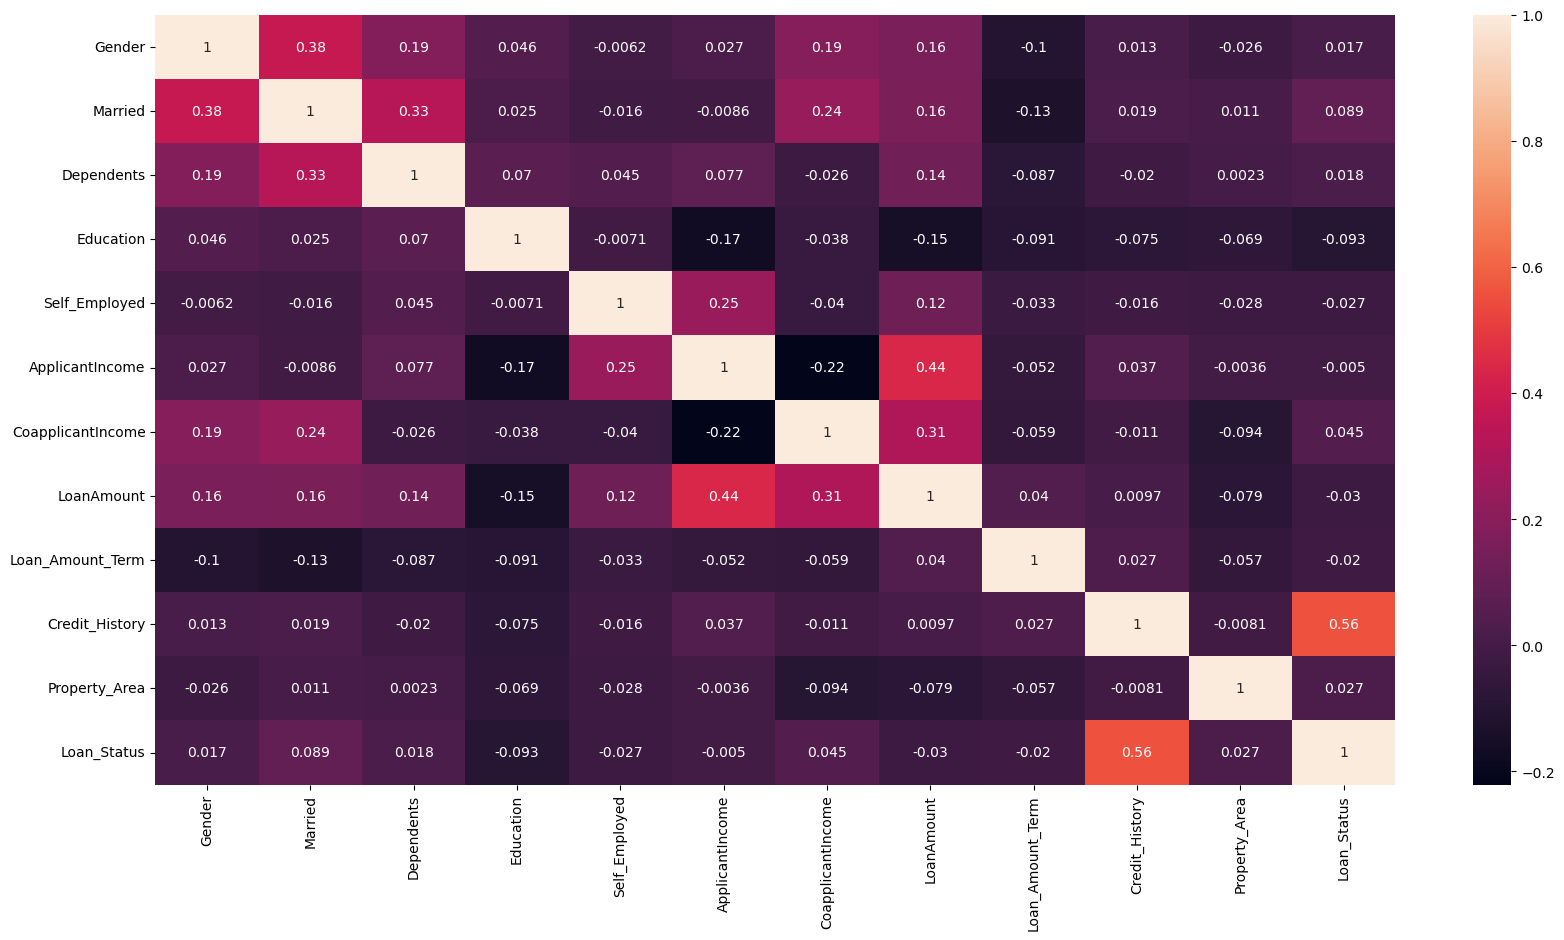

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(df_loan.corr(), annot = True)
plt.show()

From the correlation matrix, we can see the co-relation between all the features and the features and targets.
- Columns Gender,Married,Dependencies,CoapplicantIncome,Credit_History,Prperty_area are positively correlated with the target.
- Columns Education,Self_Employed,ApplicantIncome,LoanAmount and Loan_Amount_Term are negatively correlated with the target.
- The target column Loan_Status is highly positively correlated with the feature Credit_History. 
- The other features have very less correlation with the target column.

### Visualizing the correlation between label and features using plot

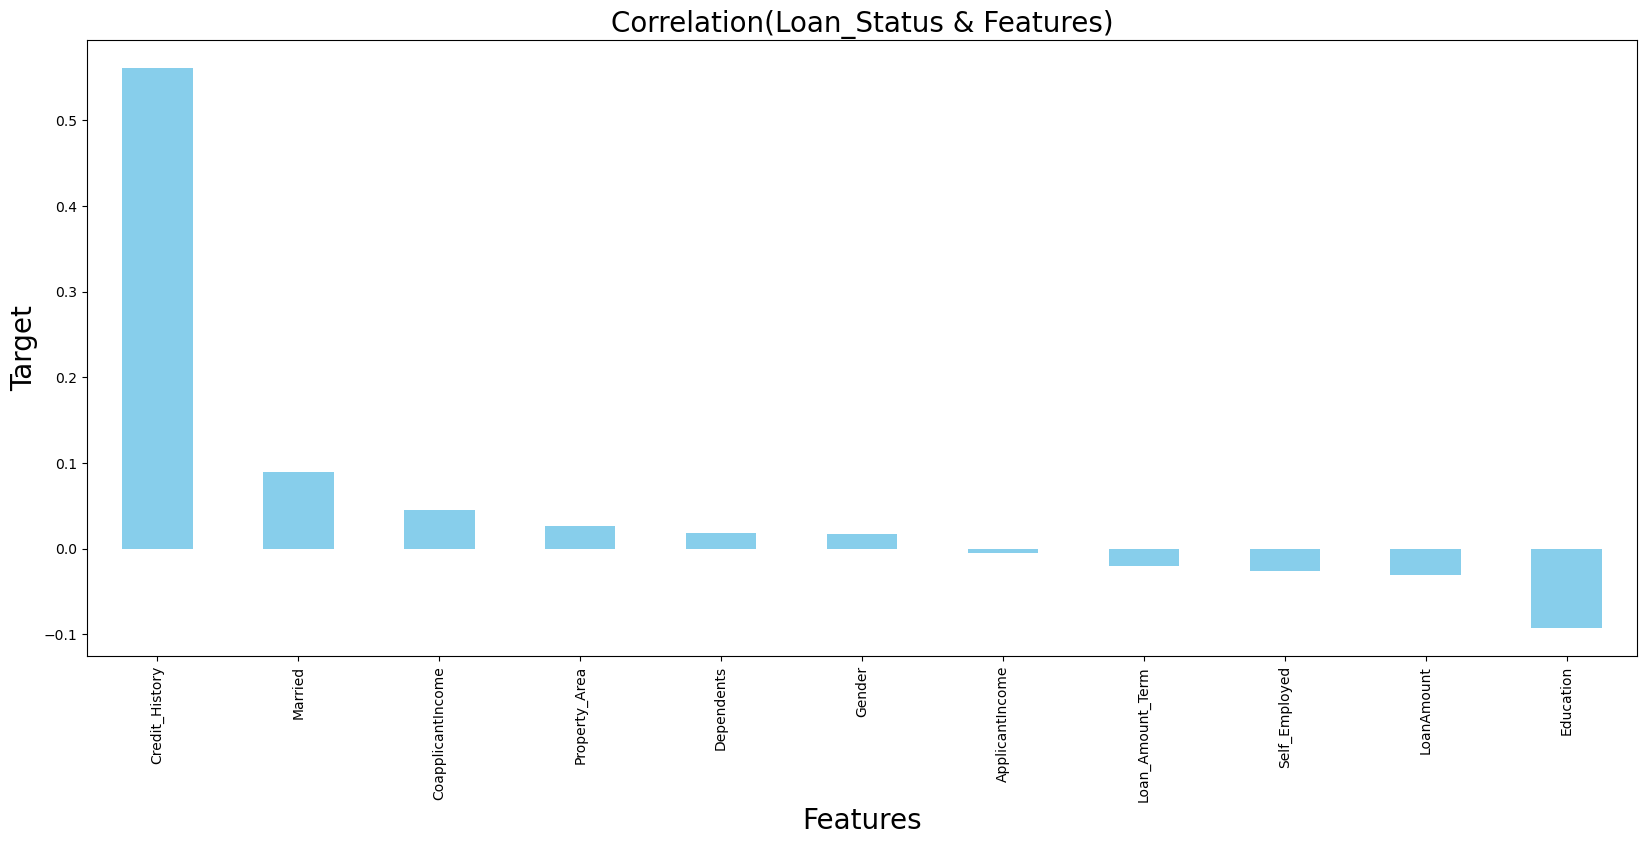

In [39]:
# visualization of target "Loan_Status" with other features in plots
plt.figure(figsize =(20, 8))
df_loan.corr()['Loan_Status'].sort_values(ascending = False).drop(['Loan_Status']).plot(kind ='bar', color ='skyblue')
plt.xlabel('Features',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation(Loan_Status & Features)',fontsize=20)
plt.show()

### Separating the features and target

In [40]:
x = df_loan.drop(['Loan_Status'],axis=1)  #Features
y = df_loan['Loan_Status']   #Target

#### Data Scaling using Standard Scaler

In [42]:
sc = StandardScaler()
x1 = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [43]:
x1.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.38058,0.399266,-0.861036,-0.130895,0.230853,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.38058,-0.028020,0.052840,-0.130895,0.230853,0.418513,-1.306522


### Checking VIF(variance Inflation Factor) for multicolinearity issue

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_values"]=[variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif["Features"]=x1.columns
vif

,vif_values,Features
0,1.205206,Gender
1,1.341284,Married
2,1.174161,Dependents
3,1.072993,Education
4,1.072247,Self_Employed
5,1.625897,ApplicantIncome
6,1.456240,CoapplicantIncome
7,1.662005,LoanAmount
8,1.059945,Loan_Amount_Term
9,1.009328,Credit_History


From the above we can see there is no multicolinearity issue here(all vif_values<10).

In [45]:
#checking of class imbalance of target variable
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

Here we can see the target class is imbalance.we need to balance it.

### Oversampling data using SMOTE

In [46]:
from imblearn.over_sampling import SMOTE
os=SMOTE()
x1,y1 = os.fit_resample(x1,y)

In [47]:
#Now checking value count of target column
y1.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

Now the data is balanced.So there is no class imbalance.

### Splitting the dataset in Train and Test Set

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size=0.2, random_state=0)

Here using the 80% data for the training set and 20% data for the testing set.

## Model Building(Classification)

### Decision Tree Classifier

In [49]:
model1 = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=None)
model1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [50]:
pred = model1.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(model1, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 79%
Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.78      0.78        73
           1       0.81      0.80      0.81        87

    accuracy                           0.79       160
   macro avg       0.79      0.79      0.79       160
weighted avg       0.79      0.79      0.79       160

Cross Validation Score: 0.7088755622188906
Difference between Accuracy Score and Cross Validation Score is 0.08487443778110937


### Logistic Regression

In [51]:
model2 = LogisticRegression()
model2.fit(x_train, y_train)

LogisticRegression()

In [52]:
pred = model2.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(model2, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 74%
Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.63      0.69        73
           1       0.73      0.84      0.78        87

    accuracy                           0.74       160
   macro avg       0.75      0.73      0.74       160
weighted avg       0.75      0.74      0.74       160

Cross Validation Score: 0.8163418290854573
Difference between Accuracy Score and Cross Validation Score is -0.07259182908545725


### Random Forest Classifier

In [53]:
model3 = RandomForestClassifier()
model3.fit(x_train, y_train)

RandomForestClassifier()

In [54]:
pred = model3.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(model3, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 88%
Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        73
           1       0.87      0.92      0.89        87

    accuracy                           0.88       160
   macro avg       0.88      0.88      0.88       160
weighted avg       0.88      0.88      0.88       160

Cross Validation Score: 0.7955322338830586
Difference between Accuracy Score and Cross Validation Score is 0.08571776611694137


### XGBoost Classifier

In [55]:
Model4 = XGBClassifier()
Model4.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [57]:
pred = Model4.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(Model4, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 82%
Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.84      0.81        73
           1       0.85      0.80      0.83        87

    accuracy                           0.82       160
   macro avg       0.82      0.82      0.82       160
weighted avg       0.82      0.82      0.82       160

Cross Validation Score: 0.778215892053973
Difference between Accuracy Score and Cross Validation Score is 0.040534107946026965


Taking Random Forest Classifier as our final model as the accuracy is 88% and there is no much Difference between Accuracy Score and Cross Validation Score.

### Hyper Parameter Tuning

In [58]:
#Random Forest Classifier
from sklearn.model_selection import GridSearchCV 

parameters = {'criterion':['entropy','gini'],
             'n_estimators':[20,30],
             'max_depth':[10,15],
             'min_samples_split':[10,11],
             'min_samples_leaf':[5,6]
             }

In [59]:
gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [60]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [20, 30]})

In [61]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 30}

In [62]:
Final_model=RandomForestClassifier(criterion = 'gini',max_depth = 10,min_samples_leaf = 5,min_samples_split = 10,n_estimators = 30)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')

Model Accuracy : 86%


In [63]:
# Cross Validation Score
cv_score = (cross_val_score(Final_model, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Cross Validation Score: 0.8180809595202397
Difference between Accuracy Score and Cross Validation Score is 0.03816904047976022


Now we can see the difference between Accuracy Score and Cross Validation Score is reduced to a great extent.

### ROC AUC Curve

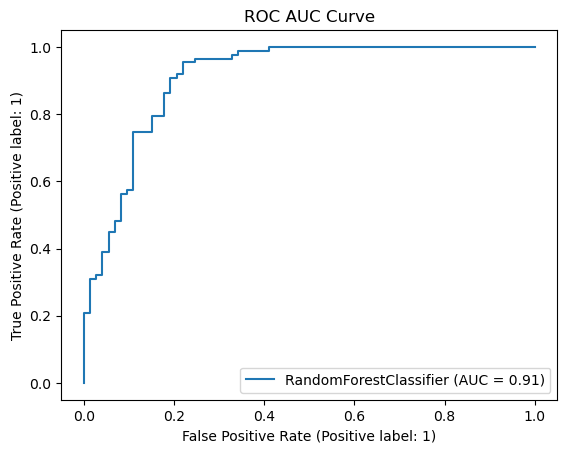

In [64]:
disp = metrics.plot_roc_curve(Final_model, x_test, y_test)
plt.title("ROC AUC Curve")
plt.show()

ROC Curve generated for final model and it shows the AUC score for final model is of 91%.

#### Saving the model

In [65]:
import joblib
joblib.dump(Final_model,"Loan Application Status Pred analysis.pkl")

['Loan Application Status Pred analysis.pkl']

Finally saved the best classification model for Loan Application Status Prediction Project analysis.